In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from BB_MesoWest.get_Synoptic import stations_timeseries


 🚚💨 Speedy Delivery from Synoptic API [timeseries]: https://api.synopticdata.com/v2//stations/timeseries?stid=WBB&recent=300&token=2562b729557f45f5958516081f06c9eb



NameError: name 'mdates' is not defined

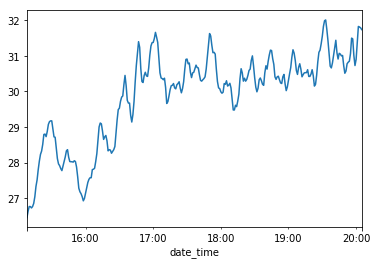

In [3]:
df = stations_timeseries(stid='WBB', recent=300)
df['air_temp'].plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

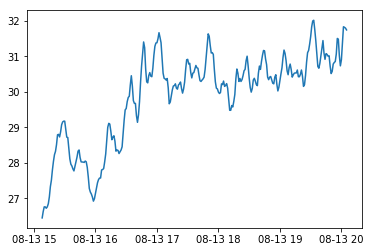

In [45]:
plt.plot(df.index.tz_localize(None), df['air_temp'])

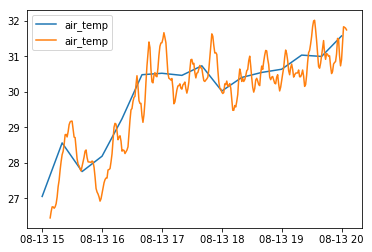

In [4]:
plt.plot(df['air_temp'].resample('20min').mean())
plt.plot(df['air_temp'])
#plt.plot(df['dew_point_temperature'])
#plt.gca().xaxis.set_major_formatter(DateFormatter('%b %d\n%H:%M'))
plt.legend()

In [5]:
df.air_temp.resample('5T').mean()

date_time
2020-08-13 15:05:00+00:00    26.5390
2020-08-13 15:10:00+00:00    26.7710
2020-08-13 15:15:00+00:00    27.5434
2020-08-13 15:20:00+00:00    28.5300
2020-08-13 15:25:00+00:00    28.9988
                              ...   
2020-08-13 19:45:00+00:00    30.9710
2020-08-13 19:50:00+00:00    30.7066
2020-08-13 19:55:00+00:00    31.1556
2020-08-13 20:00:00+00:00    31.5356
2020-08-13 20:05:00+00:00    31.7390
Freq: 5T, Name: air_temp, Length: 61, dtype: float64

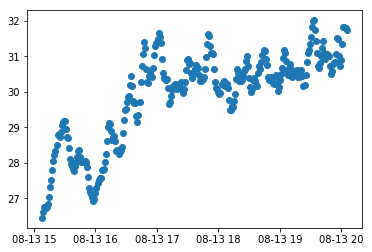

In [6]:
plt.plot_date(df.index, df.air_temp)

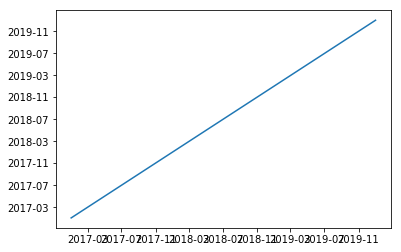

In [11]:
plt.plot(pd.date_range('2017', '2020'), pd.date_range('2017', '2020'))

In [8]:
df.index.freq= 'T'

In [15]:
dir(df.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disa

In [28]:
df.index.tz_convert('US/Pacific')[0], df.index[0]

(Timestamp('2020-08-13 08:08:00-0700', tz='US/Pacific', freq='T'),
 Timestamp('2020-08-13 15:08:00+0000', tz='UTC', freq='T'))

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


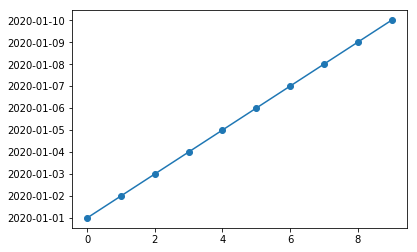

In [40]:
DATES = pd.date_range('2020', periods=10)
plt.plot(DATES, marker='o')
print(DATES)

In [42]:
pd.infer_freq(DATES_tz)

'D'

DatetimeIndex(['2020-01-01 00:00:00-08:00', '2020-01-02 00:00:00-08:00',
               '2020-01-03 00:00:00-08:00', '2020-01-04 00:00:00-08:00',
               '2020-01-05 00:00:00-08:00', '2020-01-06 00:00:00-08:00',
               '2020-01-07 00:00:00-08:00', '2020-01-08 00:00:00-08:00',
               '2020-01-09 00:00:00-08:00', '2020-01-10 00:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='D')


TypeError: float() argument must be a string or a number, not 'Timestamp'

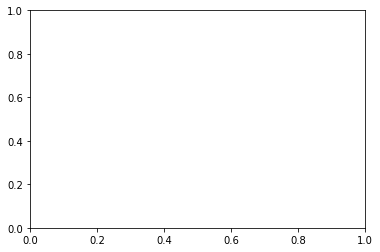

In [43]:
DATES_tz = DATES.tz_localize('US/Pacific')
DATES_tz.freq = pd.infer_freq(DATES_tz)
print(DATES_tz)
plt.plot(DATES_tz, marker='o')

TypeError: float() argument must be a string or a number, not 'Timestamp'

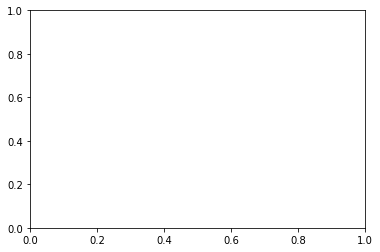

In [31]:
plt.plot(pd.date_range('2015', periods=5).tz_localize('US/Pacific'))

In [34]:
"""
============
Synotpic API
============

Quickly get mesonet data from the Synoptic API

    https://developers.synopticdata.com/

Requires a Synoptic API token. You can get your own token here:
    
    https://synopticlabs.org/api/guides/?getstarted

Documentation
-------------
https://developers.synopticdata.com/mesonet/v2/

Station Selector Parameters
---------------------------
Queried Station data can be refined with "Station Selector" arguments.
Below are some more common ones. Read the API docs to  see others.
https://developers.synopticdata.com/mesonet/v2/station-selectors/

stid : str or list
    Specify which stations you want to get data for by Station ID.
    May be a single ID or list of IDs.
    ``['KSLC', 'UKBKB', 'KMRY']`` *or* ``'KSLC'``
state : str or list
    String or list of abbreviated state strings, i.e. ['UT','CA']
radius : str
    Only return stations within a great-circle distance from a 
    specified lat/lon point or station (by STID). May be in form
    ``"lat,lon,miles"`` *or* ``"stid,miles"``
vars : str or list
    Filter stations by the variables they report.
    i.e., ``['air_temp', 'wind_speed', 'wind_direction', etc.]``
    https://developers.synopticdata.com/about/station-variables/
varsoperator : {'and', 'or'}
    Define how `vars` is understood.
    Default is 'or', means any station with any variable is used.
    while 'and' means a station must report every variable to be listed.
network - int
    Network ID number. (See network API service)
    https://developers.synopticdata.com/about/station-providers/
limit : int
    Specify how many of the closest stations you want to recieve.
    limit=1 will only return the nearest station.
bbox : [lonmin, latmin, lonmax, lonmin]
    Get stations within a bounding box.
    
Other Common Parameters
-----------------------
units : {'metric', 'english'}
    See documentation for more custom unit selection.
    An example of a custom unit is ``units=temp|F`` to set just
    the temperature to degrees Fahrenheit.
obtimezone : {'UTC', 'local'}
status : {'active', 'inactive'}
"""

import sys
from datetime import datetime
import numpy as np
import requests
import urllib
import pandas as pd
from datetime import datetime

from get_credentials import get_MW_token
from BB_wx_calcs.wind import spddir_to_uv

# API Token
# Get your own token here: https://developers.synopticdata.com/
_token = get_MW_token()['token']

# API Services
# https://developers.synopticdata.com/mesonet/v2/
_service = {'auth', 'networks', 'networktypes', 'variables', 'qctypes'}
_stations = {'metadata', 'timeseries', 'precipitation', 'nearesttime', 'latest', 'latency'}
_service.update(_stations)

## API Station Selector
_stn_selector = {'stid', 'country', 'state', 'country', 'status', 'nwszone',
                 'nwsfirezone', 'cwa', 'gacc', 'subgacc', 'vars', 'varsoperator',
                 'network', 'radius', 'limit', 'bbox', 'fields'}

def synoptic_api(service, verbose=True, **params):
    '''
    Request data from the Synoptic API. Returns a *requests* object.
        
    API References
    --------------
    - https://developers.synopticdata.com/mesonet/v2/
    - https://developers.synopticdata.com/mesonet/explorer/
    
    Parameters
    ----------
    service : str
        API service to use, including {'auth', 'latest', 'metadata',
        'nearesttime', 'networks', 'networktypes', 'precipitation',
        'qctypes', 'timeseries', 'variables'}
    **params : keyword arguments
        API request parameters (arguments).
        Lists will be converted to a comma-separated string.
        Datetimes (datetime or pandas) will be parsed by f-string to YYYYmmddHHMM.
    
    Returns
    -------
    A ``requests.models.Response`` object from ``requests.get(URL, params)``
    
    Examples
    --------
    To read the json data for metadata for a station
    
    >>> synoptic_api('metadata', stid='WBB').json()
    
    >>> synoptic_api('metadata', stid=['WBB', 'KSLC']).json()
    
    '''   
    help_url = 'https://developers.synopticdata.com/mesonet/v2/'
    assert service in _service, f"`service` must be one of {_service}. See API documentation {help_url}"
    
    ## Service URL
    ##------------
    root = 'https://api.synopticdata.com/v2/'
    
    if service in _stations:    
        URL = f"{root}/stations/{service}"
    else:
        URL = f"{root}/{service}"
        
    ## Set API token
    ##--------------
    ## Default token is set at top of this file, but you may overwrite
    ## with keyword argument.
    params.setdefault('token', _token)
    
    ## Parse parameters
    ##-----------------
    # Change some keyword parameters to the appropriate request format
    
    ## 1) Force all param keys to be lower case
    params = {k.lower(): v for k, v in params.items()}
    
    ## 2) Join lists as comma separtated strings.
    ##    For example, stid=['KSLC', 'KMRY'] --> stid='KSLC,KRMY').
    for key, value in params.items():           
        if isinstance(value, list) and key not in ['obrange']:
            params[key] = ','.join(value)
        
    ## 2) Datetimes should be string: 'YYYYmmddHHMM' (obrange is 'YYYYmmdd')
    for i in ['start', 'end', 'expire', 'attime']:
        if i in params and not isinstance(params[i], str):
            params[i] = f"{params[i]:%Y%m%d%H%M}"
    if 'obrange' in params and not isinstance(params['obrange'], str): 
        # obrange could be one date or a list of two dates.
        if not hasattr(params['obrange'], '__len__'):
            params['obrange'] = [params['obrange']]
        params['obrange'] = ','.join([f'{i:%Y%m%d}' for i in params['obrange']])    
    
    ########################
    # Make the API request #
    ########################
    f = requests.get(URL, params)
    
    if service == 'auth':
        return f
    
    # Check Returned Data
    code = f.json()['SUMMARY']['RESPONSE_CODE']
    msg = f.json()['SUMMARY']['RESPONSE_MESSAGE']
    decode_url = urllib.parse.unquote(f.url)

    assert code == 1, f"🛑 There are errors in the API request {decode_url}. {msg}"

    if verbose:
        print(f'\n 🚚💨 Speedy Delivery from Synoptic API [{service}]: {decode_url}\n')
    
    return f

def stations_metadata(verbose=True, **params):
    """
    Get station metadata for stations as a Pandas DataFrame.

    https://developers.synopticdata.com/mesonet/v2/stations/metadata/

    Parameters
    ----------
    **params : keyword arguments
        Synoptic API arguments used to specify the data request.
        e.g., sensorvars, obrange, obtimezone, etc.
        
    Others: STATION SELECTION PARAMETERS
    https://developers.synopticdata.com/mesonet/v2/station-selectors/
    """
    assert any([i in _stn_selector for i in params]), \
    f"🤔 Please assign a station selector (i.e., {_stn_selector})"

    # Get the data
    web = synoptic_api('metadata', verbose=verbose, **params)
    data = web.json()
        
    # Initialize a DataFrame
    df = pd.DataFrame(data['STATION'], index=[i['STID'] for i in data['STATION']])
    
    # Convert data to numeric values (if possible)
    df = df.apply(pd.to_numeric, errors='ignore')

    # Deal with "Period Of Record" dictionary
    df = pd.concat([df, df.PERIOD_OF_RECORD.apply(pd.Series)], axis=1)
    df[['start', 'end']] = df[['start', 'end']].apply(pd.to_datetime)

    # Rename some fields.
    # latitude and longitude are made lowercase to conform to CF standard
    df.drop(columns=['PERIOD_OF_RECORD'], inplace=True)
    df.rename(columns=dict(LATITUDE='latitude', LONGITUDE='longitude',
                           start='RECORD_START', end='RECORD_END'),
              inplace=True)
    
    df.attrs['URL'] = urllib.parse.unquote(web.url)
    df.attrs['UNITS'] = {'ELEVATION': 'ft'}
    df.attrs['SUMMARY'] = data['SUMMARY']
    return df.transpose().sort_index()

def stations_timeseries(verbose=True, **params):
    """
    Get station data for time series.

    https://developers.synopticdata.com/mesonet/v2/stations/timeseries/

    Parameters
    ----------
    **params : keyword arguments
        Synoptic API arguments used to specify the data request.
        **Must include ``start`` and ``end`` argument *or* ``recent``.**  
    start, end : datetime
        Start and end of time series
    recent : int
        Minutes for recent observations.
   
    Others: obtimezone, units, and STATION SELECTION PARAMETERS
    https://developers.synopticdata.com/mesonet/v2/station-selectors/
    
    Examples
    --------
    >>> stations_timeseries(stid='WBB', recent=100)
    >>> stations_timeseries(radius='UKBKB,10', vars='air_temp', recent=100)
    """
    check1 = 'start' in params and 'end' in params
    check2 = 'recent' in params
    assert check1 or check2, "🤔 `start` and `end` *or* `recent` is required"
    assert any([i in _stn_selector for i in params]), \
    f"🤔 Please assign a station selector (i.e., {_stn_selector})"

    # Get the data
    web = synoptic_api('timeseries', verbose=verbose, **params)
    data = web.json()
    
    # Build a separate pandas.DataFrame for each station.
    Z = []
    for stn in data['STATION']:
        obs = stn.pop('OBSERVATIONS')
        senvars = stn.pop('SENSOR_VARIABLES')
        
        df = pd.DataFrame(obs).set_index('date_time')
        df.index = pd.to_datetime(df.index)
        
        # Break wind into U and V components, if speed and direction are available
        if all(['wind_speed' in senvars, 'wind_direction' in senvars]):
            for i_spd, i_dir in zip(senvars['wind_speed'].keys(),
                                    senvars['wind_direction'].keys()):
                u, v = spddir_to_uv(obs[i_spd], obs[i_dir])
                this_set = '_'.join(i_spd.split('_')[-2:])
                df[f'wind_u_{this_set}'] = u
                df[f'wind_v_{this_set}'] = v
        
        # Remove 'set_1d' and 'set_1d' from column names.
        # Sets 2+ will retain the full name. The user should refer to
        # the SENSOR_VARIABLES to see which are derived variables.
        col_names = {i: i.replace('_set_1d', '').replace('_set_1', '') for i in df.columns}
        df.rename(columns=col_names, inplace=True)
              
        # Remaining data in dict will be returned as attribute
        df.attrs = stn
        
        # Convert some strings to flaot/int
        for k, v in df.attrs.items():
            if isinstance(v, str):
                try:
                    n = float(v)
                    if n.is_integer():
                        df.attrs[k] = int(n)
                    else:
                        df.attrs[k] = n
                except:
                    pass
        
        # Rename lat/lon to lowercase to match CF convenctions
        df.attrs['latitude'] = df.attrs.pop('LATITUDE')
        df.attrs['longitude'] = df.attrs.pop('LONGITUDE')
        
        # Include other info
        df.attrs['UNITS'] = data['UNITS']
        df.attrs['QC_SUMMARY'] = data['QC_SUMMARY']
        df.attrs['SUMMARY'] = data['SUMMARY']
        df.attrs['SENSOR_VARIABLES'] = senvars
        
        Z.append(df)
        
    if len(Z) == 1:
        return Z[0]
    else:
        if verbose: print(f'Returned [{len(Z)}] stations. {[i.attrs["STID"] for i in Z]}')
        return Z

def stations_nearesttime(verbose=True, **params):
    """
    Get station data nearest a datetime.

    https://developers.synopticdata.com/mesonet/v2/stations/nearesttime/

    Parameters
    ----------
    **params : keyword arguments
        Synoptic API arguments used to specify the data request.
        **Must include ``attime`` and ``within``**   
    attime : datetime
        Datetime you want to the the nearest observations for.
    within : int
        How long ago is the oldest observation you want to receive, in minutes.
        
    Other: obtimezone, units, STATION SELECTION PARAMETERS:
    https://developers.synopticdata.com/mesonet/v2/station-selectors/
    
    Examples
    --------
    >>> stations_nearesttime(attime=datetime(2020,1,1), within=60, stid='WBB')
    """
    assert 'attime' in params, "🤔 `attime` is a required parameter (datetime)."
    assert 'within' in params, "🤔 `within` is a required parameter (int, in minutes)."
    assert any([i in _stn_selector for i in params]), \
    f"🤔 Please assign a station selector (i.e., {_stn_selector})"

    # Get the data
    web = synoptic_api('nearesttime', verbose=verbose, **params)
    data = web.json()
    
    dfs = []
    for i in data['STATION']:
        obs = i.pop('OBSERVATIONS')
        df = pd.DataFrame(obs)

        for k, v in i.items():
            if k in ['LATITUDE', 'LONGITUDE']:
                # lat/lon is lowercase for CF compliant variable name
                df[k.lower()] = [None, v]
            else:
                df[k] = [None, v]

        # Remove 'set_1d' and 'set_1d' from column names.
        # Sets 2+ will retain the full name. The user should refer to
        # the SENSOR_VARIABLES to see which are derived variables.
        col_names = {i: i.replace('_value_1d', '').replace('_value_1', '') for i in df.columns}
        df.rename(columns=col_names, inplace=True)

        # Convert date_time to datetime object
        df.loc['date_time'] = pd.to_datetime(df.loc['date_time'])


        df = df.transpose().sort_index()
        rename = dict(date_time=f"{i['STID']}_date_time", value=i['STID'])
        df.rename(columns=rename, inplace=True)
        dfs.append(df)
    
    df = pd.concat(dfs, axis=1)
    df.attrs['UNITS'] = data['UNITS']
    df.attrs['SUMMARY'] = data['SUMMARY']
    df.attrs['QC_SUMMARY'] = data['QC_SUMMARY']
    
    return df

def stations_latest(verbose=True, **params):
    """
    Get the latest station data.

    https://developers.synopticdata.com/mesonet/v2/stations/latest/

    Parameters
    ----------
    **params : keyword arguments
        Synoptic API arguments used to specify the data request.
        **Must include ``within``.**
    within : int
        Number of minutes to consider.
    
    Others: obtimezone, units, STATION SELECTION PARAMETERS:
    https://developers.synopticdata.com/mesonet/v2/station-selectors/
        
    Examples
    --------
    >>> stations_nearesttime(attime=datetime(2020,1,1), within=60, stid='WBB')
    """
    assert any([i in _stn_selector for i in params]), \
    f"🤔 Please assign a station selector (i.e., {_stn_selector})"
    
    params.setdefault('within', 60)

    # Get the data
    web = synoptic_api('latest', verbose=verbose, **params)
    data = web.json()
    
    dfs = []
    for i in data['STATION']:
        obs = i.pop('OBSERVATIONS')
        df = pd.DataFrame(obs)

        for k, v in i.items():
            if k in ['LATITUDE', 'LONGITUDE']:
                # lat/lon is lowercase for CF compliant variable name
                df[k.lower()] = [None, v]
            else:
                df[k] = [None, v]

        # Remove 'set_1d' and 'set_1d' from column names.
        # Sets 2+ will retain the full name. The user should refer to
        # the SENSOR_VARIABLES to see which are derived variables.
        col_names = {i: i.replace('_value_1d', '').replace('_value_1', '') for i in df.columns}
        df.rename(columns=col_names, inplace=True)

        # Convert date_time to datetime object
        df.loc['date_time'] = pd.to_datetime(df.loc['date_time'])


        df = df.transpose().sort_index()
        rename = dict(date_time=f"{i['STID']}_date_time", value=i['STID'])
        df.rename(columns=rename, inplace=True)
        dfs.append(df)
    
    df = pd.concat(dfs, axis=1)
    
    df.attrs['UNITS'] = data['UNITS']
    df.attrs['SUMMARY'] = data['SUMMARY']
    df.attrs['QC_SUMMARY'] = data['QC_SUMMARY']
    
    return df  

def stations_precipitation(verbose=True, **params):
    """
    Get the precipitation data.

    https://developers.synopticdata.com/mesonet/v2/stations/precipitation/

    Parameters
    ----------
    **params : keyword arguments
        Synoptic API arguments used to specify the data request.
        Requires `start` and `end` *or* `recent`.    
    """
    print("🙋🏼‍♂️ HI! THIS FUNCTION IS NOT COMPLETED YET. WILL JUST RETURN JSON.")
    
    check1 = 'start' in params and 'end' in params
    check2 = 'recent' in params
    assert check1 or check2, "🤔 `start` and `end` *or* `recent` is required"
    assert any([i in _stn_selector for i in params]), \
    f"🤔 Please assign a station selector (i.e., {_stn_selector})"
    
    # Get the data
    web = synoptic_api('precipitation', verbose=verbose, **params)
    data = web.json()
    
    return data

def networks(verbose=True, **params):
    """
    Return a DataFrame of available Networks and their metadata
    
    https://developers.synopticdata.com/mesonet/v2/networks/
    https://developers.synopticdata.com/about/station-network-type/
    
    Parameters
    ----------
    **param : keyword arguments    
    id : int or list of int
        Filter by network number.
    shortname : str or list of str
        Netork shortname, i.e. 'NWS/FAA', 'RAWS', 'UTAH DOT',         
    """
    # Get the data
    web = synoptic_api('networks', verbose=verbose, **params)
    data = web.json()
    
    df = pd.DataFrame(data['MNET'])
    df.set_index('ID', inplace=True)
    df['LAST_OBSERVATION'] = pd.to_datetime(df.LAST_OBSERVATION)
    df.attrs['SUMMARY'] = data['SUMMARY']
    
    return df

def networktypes(verbose=True, **params):
    """
    Get a DataFrame of network types
    
    https://developers.synopticdata.com/mesonet/v2/networktypes/
    https://developers.synopticdata.com/about/station-network-type/
    
    Parameters
    ----------
    **params : keyword arguments
    id : int
        Select just the network type you want
    """
    
    # Get the data
    web = synoptic_api('networktypes', verbose=verbose, **params)
    data = web.json()
    
    df = pd.DataFrame(data['MNETCAT'])
    df.set_index('ID', inplace=True)
    df.attrs['SUMMARY'] = data['SUMMARY']
    
    return df

def variables(verbose=True, **params):
    """
    Return a DataFrame of available station variables
    
    https://developers.synopticdata.com/mesonet/v2/variables/
    https://developers.synopticdata.com/mesonet/v2/api-variables/
    
    Parameters
    ----------
    **param : keyword arguments
        There are none for the 'variables' service.

    """
    # Get the data
    web = synoptic_api('variables', verbose=verbose, **params)
    data = web.json()
    
    df = pd.concat([pd.DataFrame(i) for i in data['VARIABLES']], axis=1).transpose()
    #df.set_index('vid', inplace=True)
    df.attrs['SUMMARY'] = data['SUMMARY']
    
    return df

def qctypes(verbose=True, **params):
    """
    Return a DataFrame of available quality control (QC) types
    
    https://developers.synopticdata.com/mesonet/v2/qctypes/
    https://developers.synopticdata.com/about/qc/
    
    Parameters
    ----------
    **param : keyword arguments
        Available parameters include `id` and `shortname`
    """
    # Get the data
    web = synoptic_api('qctypes', verbose=verbose, **params)
    data = web.json()
        
    df = pd.DataFrame(data['QCTYPES'])
    df = df.apply(pd.to_numeric, errors='ignore')
    df.set_index('ID', inplace=True)
    df.sort_index(inplace=True)
    df.attrs['SUMMARY'] = data['SUMMARY']
    
    return df

def auth(helpme=True, verbose=True, **params):
    """
    Return a DataFrame of authentication controls.
    
    https://developers.synopticdata.com/mesonet/v2/auth/
    https://developers.synopticdata.com/settings/
    
    Parameters
    ----------
    helpme : bool
        True - It might be easier to deal with generating new tokens 
        and listing tokens on the web settings, so just return the
        URL to help you make these changes via web.
        False - Access the ``auth`` API service.
    **param : keyword arguments
       
    Some include the following
    
    disableToken : str
    list : {1, 0}
    expire : datetime
    
    Examples
    --------
    List all tokens
    >>> auth(helpme=False, apikey='YOUR_API_KEY', list=1)
    
    Create new token (tokens are disabled after 10 years)
    >>> auth(helpme=False, apikey='YOUR_API_KEY')
    
    Create new token with expiration date
    >>> auth(helpme=False, apikey='YOUR_API_KEY', expire=datetime(2021,1,1))
    
    Disable a token (not sure why this doesn't do anything)
    >>> auth(helpme=False, apikey='YOUR_API_KEY', disable='TOKEN')
    """
    if helpme:
        web = 'https://developers.synopticdata.com/settings/'
        print(f"It's easier to manage these via the web settings: {web}")
    else:
        assert 'apikey' in params, f'🛑 `apikey` is a required argument. {web}'
        web = synoptic_api('auth', verbose=verbose, **params)
        data = web.json()
        return data
    
# Other Services
#---------------
# stations_precipitation : * NOT FINISHED
# stations_latency :
# stations_qcsegments :

In [39]:
a = qctypes()
a


 🚚💨 Speedy Delivery from Synoptic API [qctypes]: https://api.synopticdata.com/v2//qctypes?token=2562b729557f45f5958516081f06c9eb



,SOURCE_ID,SHORTNAME,NAME
ID,,,
1,1,sl_range_check,SynopticLabs Range Check
3,1,sl_pers_check,SynopticLabs Temporal Persistence Check
10,1,sl_windspd_maxgust_check,SynopticLabs Wind Speed vs. Maximum Gusts
12,1,sl_windspd_winddir_check,SynopticLabs Wind Speed vs. Wind Direction
13,2,ma_range_check,MADIS Range Check
...,...,...,...
101,1,sl_percentile_hioutlier_check,SynopticLabs Percentile High Outlier Check
102,1,sl_percentile_loflag_check,SynopticLabs Percentile Low Flag Check
103,1,sl_percentile_looutlier_check,SynopticLabs Percentile Low Outlier Check


In [23]:
a[1]

,wind_speed,air_temp
date_time,,
2020-08-01 00:00:00+00:00,0.448,38.889
2020-08-01 00:15:00+00:00,0.000,38.889
2020-08-01 00:30:00+00:00,0.000,38.889
2020-08-01 00:46:00+00:00,0.000,37.222
2020-08-01 01:02:00+00:00,0.000,37.778
...,...,...
2020-08-01 22:45:00+00:00,0.000,39.444
2020-08-01 23:00:00+00:00,0.448,39.444
2020-08-01 23:16:00+00:00,0.000,39.444


In [135]:
a = stations_nearesttime(stid='wbb,ukbkb,qhw', attime=datetime(2020,1,1), within=60)
a


 🚚💨 Speedy Delivery from Synoptic API [nearesttime]: https://api.synopticdata.com/v2//stations/nearesttime?stid=wbb,ukbkb,qhw&attime=202001010000&within=60&token=2562b729557f45f5958516081f06c9eb



,WBB_date_time,WBB,QHW_date_time,QHW,UKBKB_date_time,UKBKB
ELEVATION,NaT,4806,NaT,4284,NaT,4734
ELEV_DEM,NaT,4727.7,NaT,4291.3,NaT,4740.8
ID,NaT,1,NaT,589,NaT,37032
MNET_ID,NaT,153,NaT,9,NaT,65
NAME,NaT,U of U William Browning Building,NaT,Hawthorne,NaT,EW2355 Spanish Fork
PERIOD_OF_RECORD,NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",NaT,"{'start': '1997-03-28T00:00:00Z', 'end': '2020...",NaT,"{'start': '2013-03-13T00:00:00Z', 'end': '2020..."
PM_25_concentration,2020-01-01 00:00:00+00:00,16.07,2020-01-01 00:00:00+00:00,11.9,NaT,NaN
QC_FLAGGED,NaT,False,NaT,False,NaT,False
RESTRICTED,NaT,False,NaT,False,NaT,False
SENSOR_VARIABLES,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...


In [114]:
dfs[0].loc['date_time'] = pd.to_datetime(dfs[0].loc['date_time'])

In [115]:
dfs[0]

,solar_radiation,wind_gust,dew_point_temperature,volt,heat_index,precip_accum_one_minute,wind_cardinal_direction,wind_direction,sea_level_pressure,pressure,...,STID,SENSOR_VARIABLES,ELEV_DEM,longitude,STATE,RESTRICTED,QC_FLAGGED,latitude,TIMEZONE,ID
date_time,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,2020-08-13 17:10:00+00:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
value,808,2.449,-2.61,13.01,28.28,0,NW,319.2,100679,85594,...,WBB,{'wind_speed': {'wind_speed_value_1': {'period...,4727.7,-111.84755,UT,False,False,40.76623,America/Denver,1


In [76]:
pd.concat([df1, df2], axis=1)

,WBB_date_time,WBB,QHW_date_time,QHW
solar_radiation_value_1,2020-08-13T16:45:00Z,741.7,2020-08-13T15:45:00Z,737
wind_gust_value_1,2020-08-13T16:45:00Z,0.391,NaN,NaN
dew_point_temperature_value_1d,2020-08-13T16:45:00Z,-2.18,NaN,NaN
volt_value_1,2020-08-13T16:45:00Z,13.02,NaN,NaN
heat_index_value_1d,2020-08-13T16:45:00Z,28.57,NaN,NaN
precip_accum_one_minute_value_1,2020-08-13T16:45:00Z,0,NaN,NaN
wind_cardinal_direction_value_1d,2020-08-13T16:45:00Z,SW,2020-08-13T15:45:00Z,NW
wind_direction_value_1,2020-08-13T16:45:00Z,217.2,2020-08-13T15:45:00Z,317
sea_level_pressure_value_1d,2020-08-13T16:45:00Z,100664,NaN,NaN
pressure_value_1,2020-08-13T16:45:00Z,85597,NaN,NaN


In [31]:
a = stations_nearesttime(attime=datetime(2020, 1, 1), within=10, stid='wbb,kslc', vars='ozone_concentration,air_temp')


 🚚💨 Speedy Delivery from Synoptic API [nearesttime]: https://api.synopticdata.com/v2//stations/nearesttime?attime=202001010000&within=10&stid=wbb,kslc&vars=ozone_concentration,air_temp&token=2562b729557f45f5958516081f06c9eb



In [35]:
pd.concat([pd.DataFrame(i['OBSERVATIONS']).transpose() for i in a['STATION']], axis=1)

,date_time,value,date_time,value
ozone_concentration_value_1,2020-01-01T00:00:00Z,26.95,NaN,NaN
air_temp_value_1,2020-01-01T00:00:00Z,-0.91,2020-01-01T00:00:00Z,0


In [41]:
a

,SOURCE_ID,SHORTNAME,NAME
ID,,,
1,1,sl_range_check,SynopticLabs Range Check
3,1,sl_pers_check,SynopticLabs Temporal Persistence Check
10,1,sl_windspd_maxgust_check,SynopticLabs Wind Speed vs. Maximum Gusts
12,1,sl_windspd_winddir_check,SynopticLabs Wind Speed vs. Wind Direction
81,1,sl_rate_check,SynopticLabs Rate Change Check
...,...,...,...
76,2,ma_snowdepth_swe_check,MADIS Snow Depth vs. Snow Water Equivalent
77,3,arlfrd_manual_check,ARLFRD Manual Data Check
78,5,mw_multvariate_lin_reg_check,MesoWest Multivariate Linear Regression Check


In [33]:
a.sort_index()

,SOURCE_ID,SHORTNAME,NAME
ID,,,
1,1,sl_range_check,SynopticLabs Range Check
3,1,sl_pers_check,SynopticLabs Temporal Persistence Check
10,1,sl_windspd_maxgust_check,SynopticLabs Wind Speed vs. Maximum Gusts
12,1,sl_windspd_winddir_check,SynopticLabs Wind Speed vs. Wind Direction
13,2,ma_range_check,MADIS Range Check
...,...,...,...
101,1,sl_percentile_hioutlier_check,SynopticLabs Percentile High Outlier Check
102,1,sl_percentile_loflag_check,SynopticLabs Percentile Low Flag Check
103,1,sl_percentile_looutlier_check,SynopticLabs Percentile Low Outlier Check


In [117]:
a = networktypes()
a


 🚚💨 Speedy Delivery from Synoptic API [networktypes]: https://api.synopticdata.com/v2//networktypes?token=2562b729557f45f5958516081f06c9eb



,PERIOD_OF_RECORD,DESCRIPTION,NAME
ID,,,
1,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",Agricultural,AG
2,"{'start': '1997-01-03T00:00:00Z', 'end': '2007...",Air Quality,AQ
3,"{'start': '1999-01-05T00:00:00Z', 'end': '2020...","Offshore, CA, MX",EXT
4,"{'start': '1997-04-01T00:00:00Z', 'end': '2019...",Federal and state networks,FED+
5,"{'start': '1997-04-01T00:00:00Z', 'end': '2014...",Hydrological,HYDRO
6,"{'start': '1998-01-27T00:00:00Z', 'end': '2004...",State and Local,LOCAL
7,"{'start': '1997-04-03T00:00:00Z', 'end': '2002...",NWS/FAA,NWS
8,"{'start': '1997-09-11T00:00:00Z', 'end': '2020...",CWOP,PUBLIC
9,"{'start': '1999-11-01T00:00:00Z', 'end': '2005...",Fire weather,RAWS


In [115]:
b = networks()
b


 🚚💨 Speedy Delivery from Synoptic API [networks]: https://api.synopticdata.com/v2//networks?token=2562b729557f45f5958516081f06c9eb



,CATEGORY,REPORTING_STATIONS,PERIOD_OF_RECORD,LAST_OBSERVATION,URL,PERCENT_REPORTING,PERIOD_CHECKED,TOTAL_STATIONS,ACTIVE_STATIONS,LONGNAME,SHORTNAME,PERCENT_ACTIVE
ID,,,,,,,,,,,,
1,7,2486,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",2020-08-12 23:15:00+00:00,None,96.81,120.0,3452,2568,National Weather Service/Federal Aviation Admi...,NWS/FAA,74.39
2,9,2279,"{'start': '1997-01-03T00:00:00Z', 'end': '2007...",2020-08-12 22:54:00+00:00,None,98.28,90.0,3373,2319,Interagency Remote Automatic Weather Stations,RAWS,68.75
3,4,28,"{'start': '1999-01-05T00:00:00Z', 'end': '2020...",2020-08-12 22:55:00+00:00,None,100.00,30.0,31,28,U.S. Army Dugway Proving Grounds,DUGWAY,90.32
4,10,136,"{'start': '1997-04-01T00:00:00Z', 'end': '2019...",2020-08-12 22:50:00+00:00,None,93.79,60.0,181,145,Utah Department of Transportation,UTAH DOT,80.11
5,4,34,"{'start': '1997-04-01T00:00:00Z', 'end': '2014...",2020-08-12 22:50:00+00:00,None,100.00,60.0,38,34,NOAA Air Resources Laboratory Field Research D...,ARL FRD,89.47
...,...,...,...,...,...,...,...,...,...,...,...,...
261,6,30,"{'start': '1997-04-12T00:00:00Z', 'end': '2020...",2020-08-12 22:50:00+00:00,None,100.00,120.0,30,30,NV Energy,NV-ENERGY,100.00
262,7,11134,"{'start': '1997-04-12T00:00:00Z', 'end': '2020...",2020-08-12 22:06:00+00:00,None,58.02,1440.0,20857,19190,"Community Collaborative Rain, Hail and Snow Ne...",COCORAHS,92.01
263,6,11,"{'start': '1997-04-12T00:00:00Z', 'end': '2020...",2020-08-12 21:58:00+00:00,None,100.00,120.0,11,11,Scripps CW3E Mesonet,CW3E,100.00


In [106]:
a

,long_name,unit,vid
air_temp,Temperature,Celsius,3
dew_point_temperature,Dew Point,Celsius,4
relative_humidity,Relative Humidity,%,5
wind_speed,Wind Speed,m/s,6
wind_direction,Wind Direction,Degrees,7
...,...,...,...
wind_cardinal_direction,Wind cardinal direction,,0
weather_summary,Weather summary,,0
heat_index,Heat index,,0
wet_bulb_temperature,Wet bulb temperature,,0


In [55]:
a = networks()


 🚚💨 Speedy Delivery from Synoptic API [networks]: https://api.synopticdata.com/v2//networks?token=2562b729557f45f5958516081f06c9eb



In [19]:
a = stations_timeseries(stid='UKBKB', vars='air_temp', recent=100)
a


 🚚💨 Speedy Delivery from Synoptic API: https://api.synopticdata.com/v2//stations/timeseries?stid=UKBKB&vars=air_temp&recent=100&token=2562b729557f45f5958516081f06c9eb



,air_temp
date_time,
2020-08-12 21:00:00+00:00,33.333
2020-08-12 21:15:00+00:00,33.333
2020-08-12 21:30:00+00:00,33.333
2020-08-12 21:45:00+00:00,33.333
2020-08-12 22:00:00+00:00,33.889
2020-08-12 22:15:00+00:00,33.333


In [268]:
a = stations_metadata(stid='wbb')
a


 🚚💨 Speedy Delivery from Synoptic API: https://api.synopticdata.com/v2//stations/metadata?stid=wbb&token=2562b729557f45f5958516081f06c9eb



,WBB
ELEVATION,4806
ELEV_DEM,4727.7
ID,1
MNET_ID,153
NAME,U of U William Browning Building
RECORD_END,2020-08-03 03:50:00+00:00
RECORD_START,1997-01-01 00:00:00+00:00
RESTRICTED,False
STATE,UT
STATUS,ACTIVE


In [254]:
a.attrs

{'URL': 'https://api.synopticdata.com/v2//stations/metadata?stid=UKBKB,WBB&token=2562b729557f45f5958516081f06c9eb',
 'elevation units': 'feet',
 'SUMMARY': {'NUMBER_OF_OBJECTS': 2,
  'RESPONSE_CODE': 1,
  'RESPONSE_MESSAGE': 'OK',
  'METADATA_RESPONSE_TIME': '1.15609169006 ms'}}

In [214]:
df.transpose()

,WBB,UKBKB
STATUS,ACTIVE,ACTIVE
MNET_ID,153,65
ELEVATION,4806,4734
NAME,U of U William Browning Building,EW2355 Spanish Fork
STID,WBB,UKBKB
ELEV_DEM,4727.7,4740.8
longitude,-111.848,-111.628
STATE,UT,UT
RESTRICTED,False,False
latitude,40.7662,40.0987


In [185]:
df['start'].apply(pd.to_datetime)

0   1997-01-01 00:00:00+00:00
1   2013-03-13 00:00:00+00:00
Name: start, dtype: datetime64[ns, UTC]

In [101]:
b = pd.DataFrame.from_dict({i for i in a['STATION']}, orient='index')
b

TypeError: unhashable type: 'dict'

In [99]:
b.loc['ELEVATION'].astype(int)

WBB    4806
Name: ELEVATION, dtype: int64

In [16]:
a = get_mesowest_stninfo(radius='ukbkb,10', obrange=[datetime(2017,9,10), datetime(2020,1,10)])
a

[datetime.datetime(2017, 9, 10, 0, 0), datetime.datetime(2020, 1, 10, 0, 0)]

🚚 Deliver data from MesoWest API: http://api.mesowest.net/v2/stations/metadata?radius=ukbkb,10&obrange=20170910,20200110&token=2562b729557f45f5958516081f06c9eb



,KPVU,QSF,C9348,FG006,FG012,D5744,UR304,UR321,UR324,UKBKB,UTPRV,UCC13,UTBRC,PUR24,COOPPROU1,COOPSPFU1,PUR76
latitude,40.2167,40.1383,40.0944,40.025,40.03,40,40.1196,40.1794,40.0404,40.0987,40.2039,40.0672,40.073,40.0847,40.24,40.08,40.0847
longitude,-111.717,-111.66,-111.631,-111.7,-111.79,-111.7,-111.679,-111.618,-111.541,-111.628,-111.655,-111.629,-111.715,-111.611,-111.65,-111.6,-111.611
NAME,"Provo, Provo Municipal Airport",Spanish Fork,CW9348 Spanish Fork,Payson,West Mountain,DW5744 Payson,ESPFRK,SPVIL1,WCSTL1,EW2355 Spanish Fork,I-15 @ Provo,Spanish Fork,I-15 @ Beer Creek,Spanish Fork Canyon,BRIGHAM YOUNG UNIV.,SPANISH FORK POWER HOUSE,Spanish Fork Canyon B
MNET_ID,1,9,65,138,138,65,64,64,64,65,4,194,4,208,79,78,208
STID,KPVU,QSF,C9348,FG006,FG012,D5744,UR304,UR321,UR324,UKBKB,UTPRV,UCC13,UTBRC,PUR24,COOPPROU1,COOPSPFU1,PUR76
ELEVATION,4498,4577,4738,4869,4683,5270,4559,4532,4907,4734,4500,4721,4529,4729,4570,4720,4707
TIMEZONE,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver,America/Denver
STATUS,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,INACTIVE,ACTIVE,ACTIVE,INACTIVE
STATE,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT
RECORD_START,1997-01-01 00:00:00+00:00,2004-06-09 00:00:00+00:00,2008-01-02 00:00:00+00:00,2010-06-16 00:00:00+00:00,2010-06-16 00:00:00+00:00,2010-11-17 00:00:00+00:00,2012-11-07 00:00:00+00:00,2012-11-07 00:00:00+00:00,2012-11-07 00:00:00+00:00,2013-03-13 00:00:00+00:00,2013-03-13 00:00:00+00:00,2014-11-23 07:04:00+00:00,2014-03-12 00:00:00+00:00,2016-01-26 04:37:00+00:00,2016-06-08 01:08:00+00:00,2016-06-08 01:08:00+00:00,2016-07-26 03:07:00+00:00


In [10]:
a.attrs

{'URL': 'http://api.mesowest.net/v2/stations/metadata?radius=KLAX%2C10&token=2562b729557f45f5958516081f06c9eb'}

In [9]:
args = dict(stid='KLAX', radius='KLAX,10')
args

{'stid': 'KLAX', 'radius': 'KLAX,10'}

In [15]:
'&'.join([f'{i}={args[i]}' for i in args])

'stid=KLAX&radius=KLAX,10'

In [17]:
import requests

In [19]:
URL = 'http://api.mesowest.net/v2/stations/metadata'
params = dict(token='2562b729557f45f5958516081f06c9eb', stid='KLAX', radius='KLAX,10')

In [30]:
dir(requests.get(URL, params=params))

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [57]:
aa = requests.get(URL, params=params)
aa.url, URL

('http://api.mesowest.net/v2/stations/metadata?token=2562b729557f45f5958516081f06c9eb&stid=KLAX&radius=KLAX%2C10',
 'http://api.mesowest.net/v2/stations/metadata')

In [208]:
a = get_mesowest_stninfo(stid=['UKBKB', 'KLAX'])
a


🚚 Retrieved data from MesoWest API: http://api.mesowest.net/v2/stations/metadata?stid=UKBKB,KLAX&token=2562b729557f45f5958516081f06c9eb



,KLAX,UKBKB
latitude,33.9381,40.0987
longitude,-118.389,-111.628
NAME,"Los Angeles, Los Angeles International Airport",EW2355 Spanish Fork
MNET_ID,1,65
STID,KLAX,UKBKB
ELEVATION,125,4734
TIMEZONE,America/Los_Angeles,America/Denver
STATUS,ACTIVE,ACTIVE
STATE,CA,UT
RECORD_START,1997-04-12 00:00:00+00:00,2013-03-13 00:00:00+00:00


In [192]:
','.join([f'{i:%Y%m%d%H%M}' for i in [datetime(2017,1,1)]])

'201701010000'